<a href="https://colab.research.google.com/github/Samjacob007/image-segmentation/blob/main/Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import skimage.io as io
import random
from google.colab import drive

In [3]:
# Mount Drive & unzip
from google.colab import drive
drive.mount("/content/drive")
!unzip -o "/content/drive/MyDrive/RM_Segmentation_Assignment_dataset.zip" -d "/content/drive/MyDrive/coco2017/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/RM_Segmentation_Assignment_dataset.zip
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001751.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001380.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001643.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001583.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001685.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001482.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001494.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001551.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001654.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001594.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001411.jpg  
  infla

In [4]:
#  Global config
DATA_DIR = "/content/drive/MyDrive/coco2017/train-300"
ANNOTATION_PATH = f"{DATA_DIR}/labels.json"
TARGET_CLASSES = ["cake", "car", "dog", "person"]

In [5]:
#  Initialize COCO API
coco = COCO(ANNOTATION_PATH)
categories = coco.loadCats(coco.getCatIds())
category_id_map = {cat['name']: cat['id'] for cat in categories if cat['name'] in TARGET_CLASSES}

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


In [7]:
#  Utility Functions

def get_class_name(cat_id):
    return next((cat['name'] for cat in categories if cat['id'] == cat_id), "None")

def load_image_data(class_list=TARGET_CLASSES):
    image_info_set = []
    for cls in class_list:
        ids = coco.getImgIds(catIds=[category_id_map[cls]])
        image_info_set.extend(coco.loadImgs(ids))
    # Remove duplicates
    unique_images = {img['id']: img for img in image_info_set}.values()
    return list(unique_images)

def generate_segmentation_mask(img_info, class_list=TARGET_CLASSES):
    mask = np.zeros((img_info["height"], img_info["width"]), dtype=np.uint8)
    ann_ids = coco.getAnnIds(imgIds=img_info["id"], catIds=[category_id_map[c] for c in class_list])
    anns = coco.loadAnns(ann_ids)

    for ann in anns:
        class_name = get_class_name(ann["category_id"])
        if class_name in class_list:
            class_index = class_list.index(class_name) + 1  # +1 so background = 0
            obj_mask = coco.annToMask(ann)
            mask = np.maximum(mask, obj_mask * class_index)
    return mask

def display_image_and_mask(img_info):
    img_path = os.path.join(DATA_DIR, "data", img_info["file_name"])
    image = io.imread(img_path)
    mask = generate_segmentation_mask(img_info)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Segmentation Mask")
    plt.imshow(mask, cmap='jet')
    plt.axis("off")
    plt.show()

Total unique training images containing target classes: 300


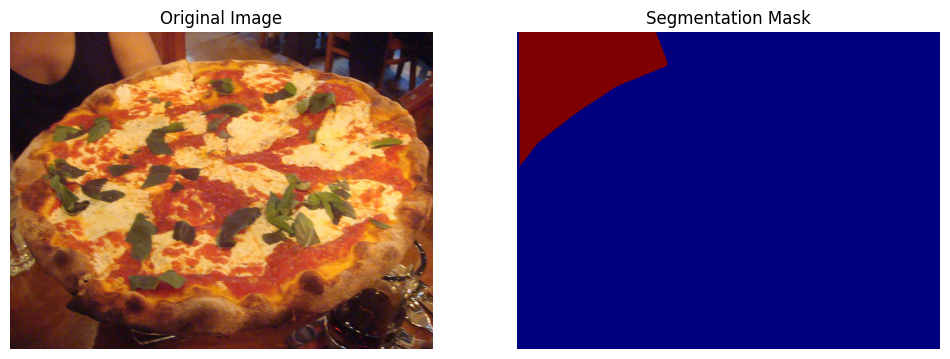

In [8]:
#  Load training images containing target objects
training_images = load_image_data()
random.shuffle(training_images)
print(f"Total unique training images containing target classes: {len(training_images)}")

# 📸 Display an example image and its segmentation mask
display_image_and_mask(training_images[15])

In [9]:
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.functional as TF
import cv2


In [11]:
def preprocess_image_and_mask(image, mask, size=(256, 256)):
    # Resize
    image = cv2.resize(image, size)
    mask = cv2.resize(mask, size, interpolation=cv2.INTER_NEAREST)  # for label maps

    # Normalize image
    image = image / 255.0  # scale to [0,1]
    if len(image.shape) == 2:  # Grayscale to RGB
        image = np.stack([image]*3, axis=-1)

    # Convert to tensors
    image_tensor = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)  # (H, W, C) → (C, H, W)
    mask_tensor = torch.tensor(mask, dtype=torch.int64)  # (H, W), class index per pixel

    return image_tensor, mask_tensor


In [12]:
class CocoSegmentationDataset(Dataset):
    def __init__(self, image_infos, coco_api, categories, image_dir, class_names, transform=None):
        self.image_infos = image_infos
        self.coco = coco_api
        self.categories = categories
        self.image_dir = image_dir
        self.class_names = class_names
        self.class_id_map = {name: i+1 for i, name in enumerate(class_names)}  # 0 = background

    def __len__(self):
        return len(self.image_infos)

    def get_class_name(self, cat_id):
        for cat in self.categories:
            if cat['id'] == cat_id:
                return cat['name']
        return "None"

    def generate_mask(self, image_info):
        mask = np.zeros((image_info["height"], image_info["width"]), dtype=np.uint8)
        ann_ids = self.coco.getAnnIds(imgIds=image_info["id"], iscrowd=None)
        anns = self.coco.loadAnns(ann_ids)

        for ann in anns:
            class_name = self.get_class_name(ann["category_id"])
            if class_name in self.class_names:
                class_index = self.class_names.index(class_name) + 1
                obj_mask = self.coco.annToMask(ann)
                mask = np.maximum(mask, obj_mask * class_index)
        return mask

    def __getitem__(self, idx):
        image_info = self.image_infos[idx]
        image_path = os.path.join(self.image_dir, image_info["file_name"])
        image = io.imread(image_path)
        mask = self.generate_mask(image_info)

        image_tensor, mask_tensor = preprocess_image_and_mask(image, mask)
        return image_tensor, mask_tensor


In [15]:

target_classes = ["cake", "car", "dog", "person"]
category_id_map = {cat['name']: cat['id'] for cat in categories if cat['name'] in target_classes}

# Gather images for each class
training_images = []
for class_name in target_classes:
    class_id = category_id_map[class_name]
    image_ids = coco.getImgIds(catIds=[class_id])
    training_images += coco.loadImgs(image_ids)

# Remove duplicates using dictionary (by image ID)
unique_training_images = list({img['id']: img for img in training_images}.values())

# Optional shuffle
import random
random.seed(42)
random.shuffle(unique_training_images)

print(f"Number of unique training images: {len(unique_training_images)}")


Number of unique training images: 300


In [16]:
from sklearn.model_selection import train_test_split

train_infos, val_infos = train_test_split(unique_training_images, test_size=0.2, random_state=42)

print(f"Train images: {len(train_infos)}")
print(f"Validation images: {len(val_infos)}")


Train images: 240
Validation images: 60


In [17]:
# Replace these with your actual paths and variables
from pycocotools.coco import COCO
train_data_path = "/content/drive/MyDrive/coco2017/train-300"
train_annotation_file = f"{train_data_path}/labels.json"
coco = COCO(train_annotation_file)
categories = coco.loadCats(coco.getCatIds())
class_names = ["cake", "car", "dog", "person"]

# Dataset instances
train_dataset = CocoSegmentationDataset(train_infos, coco, categories, f"{train_data_path}/data", class_names)
val_dataset = CocoSegmentationDataset(val_infos, coco, categories, f"{train_data_path}/data", class_names)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [18]:
for images, masks in train_loader:
    print("Image batch shape:", images.shape)  # [B, 3, 256, 256]
    print("Mask batch shape:", masks.shape)    # [B, 256, 256]
    print("Unique values in mask[0]:", torch.unique(masks[0]))
    break


Image batch shape: torch.Size([4, 3, 256, 256])
Mask batch shape: torch.Size([4, 256, 256])
Unique values in mask[0]: tensor([0, 2, 4])
